In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [96]:
dataset=pd.read_csv('Job_placement_Data.csv')

In [97]:
dataset.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [98]:
dataset=dataset.drop(columns=['ssc_board','hsc_board'])

In [99]:
dataset.shape

(215, 11)

In [100]:
dataset.isna().sum()

gender                 0
ssc_percentage         0
hsc_percentage         0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [101]:
dataset.duplicated().sum()

0

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   hsc_percentage       215 non-null    float64
 3   hsc_subject          215 non-null    object 
 4   degree_percentage    215 non-null    float64
 5   undergrad_degree     215 non-null    object 
 6   work_experience      215 non-null    object 
 7   emp_test_percentage  215 non-null    float64
 8   specialisation       215 non-null    object 
 9   mba_percent          215 non-null    float64
 10  status               215 non-null    object 
dtypes: float64(5), object(6)
memory usage: 18.6+ KB


In [103]:
for i in ['status','specialisation','work_experience','undergrad_degree','hsc_subject','gender']:
    print('column ',i,' : ',dataset[i].unique())

column  status  :  ['Placed' 'Not Placed']
column  specialisation  :  ['Mkt&HR' 'Mkt&Fin']
column  work_experience  :  ['No' 'Yes']
column  undergrad_degree  :  ['Sci&Tech' 'Comm&Mgmt' 'Others']
column  hsc_subject  :  ['Commerce' 'Science' 'Arts']
column  gender  :  ['M' 'F']


In [104]:
dataset.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


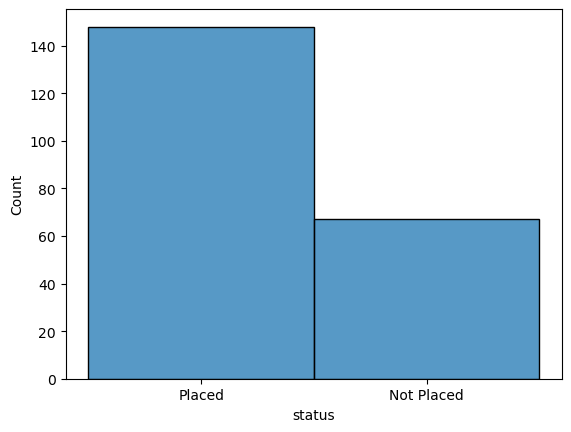

In [105]:
sns.histplot(dataset,x='status');

In [106]:
X = dataset.drop(columns='status',axis=1)
y = dataset['status']

# Enter your code here

In [119]:
from sklearn.preprocessing import LabelEncoder
d=X[['gender','hsc_subject','undergrad_degree','work_experience','specialisation']]
xtrain= d.apply(LabelEncoder().fit_transform)
xtrain  


,gender,hsc_subject,undergrad_degree,work_experience,specialisation
0,1,1,2,0,1
1,1,2,2,1,0
2,1,0,0,0,0
3,1,2,2,0,1
4,1,1,0,0,0
...,...,...,...,...,...
210,1,1,0,0,0
211,1,2,2,0,0
212,1,1,0,1,0
213,0,1,0,0,1


In [122]:
X[['gender','hsc_subject','undergrad_degree','work_experience','specialisation']]=xtrain

In [123]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)



In [124]:
rm = RandomForestClassifier()
rm

RandomForestClassifier()

In [125]:
rm.fit(X_train,y_train)
rm

RandomForestClassifier()

In [126]:
pred = rm.predict(X_test)
pred

array(['Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed'], dtype=object)

In [127]:
print(classification_report( y_test,pred))

              precision    recall  f1-score   support

  Not Placed       1.00      0.67      0.80         6
      Placed       0.89      1.00      0.94        16

    accuracy                           0.91        22
   macro avg       0.94      0.83      0.87        22
weighted avg       0.92      0.91      0.90        22



C:\Users\Faris\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


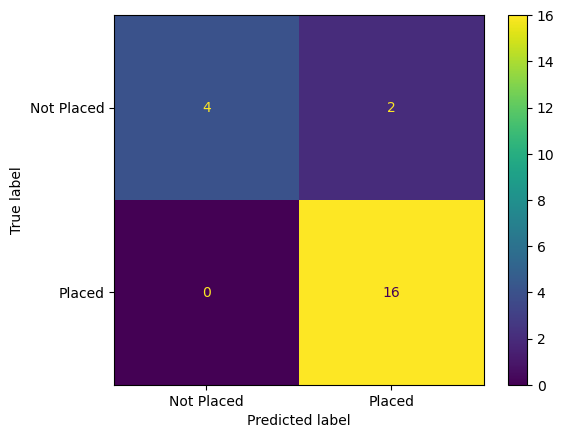

In [128]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rm, X_test, y_test)  
plt.show()

In [129]:
from sklearn.naive_bayes import MultinomialNB


In [130]:
nv =  MultinomialNB()
nv

MultinomialNB()

In [131]:
nv.fit(X_train,y_train)
nv

MultinomialNB()

In [132]:
pred = nv.predict(X_test)
pred

array(['Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed'], dtype='<U10')

In [133]:
print(classification_report( y_test,pred))

              precision    recall  f1-score   support

  Not Placed       1.00      0.67      0.80         6
      Placed       0.89      1.00      0.94        16

    accuracy                           0.91        22
   macro avg       0.94      0.83      0.87        22
weighted avg       0.92      0.91      0.90        22



C:\Users\Faris\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


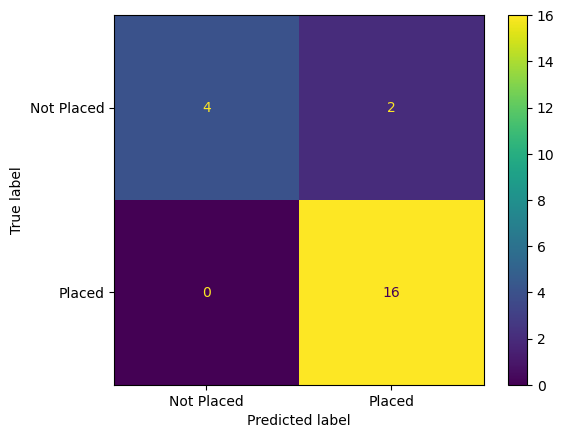

In [134]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nv, X_test, y_test)  
plt.show()